# Assignment 2

Please read the following instructions carefully:

This assignment will test your knowledge of machine learning, data visualisation, and computer vision techniques in Python. This will primarily focus on scikit-learn, seaborn/matplotlib and skimage/opencv, and how to program using these packages and as such you should use the appropriate functionality provided by the packages. You may also use Numpy, panda, etc. where appropriate for some questions. Do not use any other external packages other than these.

In the below questions you will generally need to complete the code in the cell below the question and output the required results, charts or graphs. 

Questions 1-5 are each worth 5 marks.

#### 1. Load/download and normalize the FashionMNIST training and test datasets using the instructions shown here: https://github.com/zalandoresearch/fashion-mnist#usage.
#### Please download both the training and testing sets, and load the training images, training labels, testing images, and testing labels as 'x_train', 'y_train', 'x_test', and 'y_test, correspondingly.
    
#### And show some training images by visualising a few images from the training set.

In [1]:
from sklearn.neural_network import MLPClassifier
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import mnist_reader

C:\Users\arudh\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

X_train, X_test = X_train/255.0, X_test/255.0

In [3]:
## Class lable definitions
class_labels = {0:'T-shirt/top',
                1:'Trouser',
                2:'Pullover',
                3:'Dress',
                4:'Coat',
                5:'Sandal',
                6:'Shirt',
                7:'Sneaker',
                8:'Bag',
                9:'Ankle boot'}

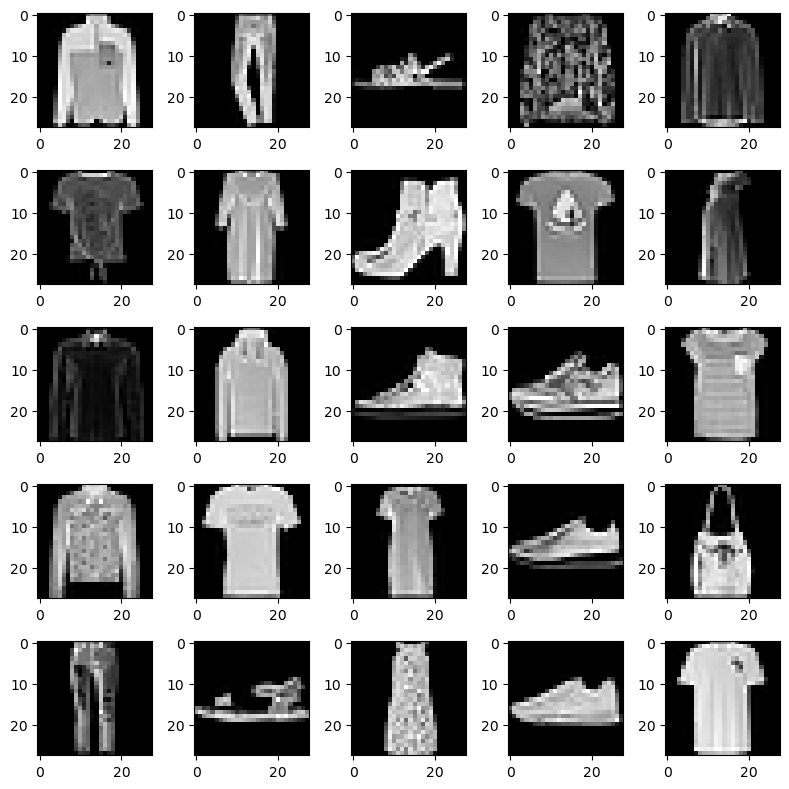

In [4]:
fig, ax = plt.subplots(5, 5, figsize=(8,8))

for x in range(0,5):
    for y in range(0,5):
        idx = np.random.randint(0, len(X_train))
        ax[x,y].imshow(X_train[idx].reshape(28,28), cmap='gray')

plt.tight_layout()

plt.show()

#### 2. Please show 5 images from the training set in a row (similar to what you have done above), but this time also show the corresponding category name (e.g. T-shirt, Dress, Bag, etc., detailed definition of the categories is list on the dataset link above) on top of each image as its title.



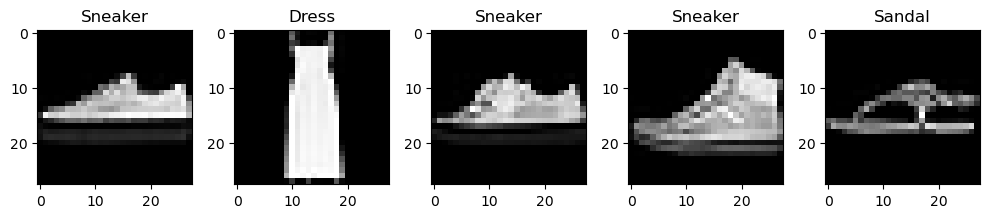

In [5]:
fig, ax = plt.subplots(1, 5, figsize=(10,5))

for img in range(0,5):
    
    idx = np.random.randint(0, len(X_train))
    ax[img].imshow(X_train[idx].reshape(28,28), cmap='gray')
    ax[img].set_title(class_labels[y_train[idx]])

plt.tight_layout()

plt.show()

#### 3. Apply a support vector classifier on the above (training) data. And use the learned/trained classifier to predict the category value on the test set.
#### The parameters to be used in the SVM classifier are: linear kernel, regularization of 0.025, and all others by default.

#### If you find the training over the whole training set takes too much time (e.g. > 10 minutes), you may only use the first 10,000 samples of the training set instead.

#### Please also show 5 examples from the test set, with the title being "predicted category name (ground-truth category name)", e.g. "Shirt (Shirt)".

In [6]:
%%time
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]

svc_sample = SVC(kernel='linear', C=0.025)          ###training on first 10000 samples
svc_sample.fit(X_train_sample, y_train_sample)

CPU times: total: 7.73 s
Wall time: 8.29 s


SVC(C=0.025, kernel='linear')

In [42]:
# y_pred_svm_sample = svc_sample.predict(X_test)

# print(classification_report(y_test, y_pred_svm_sample))

In [8]:
%%time
svc = SVC(kernel='linear', C=0.025)                ###training on entire training dataset
svc.fit(X_train, y_train)

CPU times: total: 4min 15s
Wall time: 4min 32s


SVC(C=0.025, kernel='linear')

In [9]:
y_pred_svm = svc.predict(X_test)

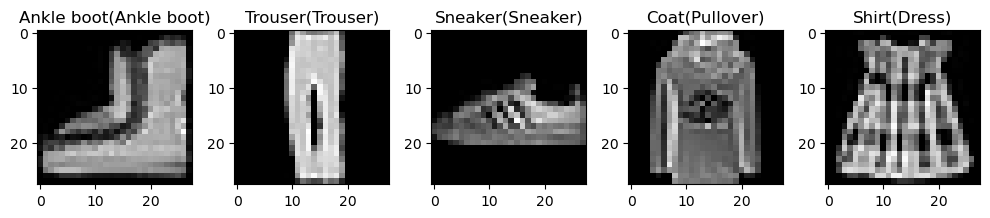

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(10,5))

for idx in range(0,5):
    img_idx = np.random.randint(0,len(X_test))                              ### Random selection of images from X_test
    y_pred_sample = svc.predict(X_test[img_idx].reshape(1, 784))
    predicted_label = class_labels[y_pred_sample[0]]
    ax[idx].imshow(X_test[img_idx].reshape(28,28), cmap='gray')
    ax[idx].set_title(f"{predicted_label}({class_labels[y_test[img_idx]]})")

plt.tight_layout()

plt.show()

In [11]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.78      0.76      1000
           3       0.85      0.88      0.86      1000
           4       0.76      0.78      0.77      1000
           5       0.95      0.93      0.94      1000
           6       0.66      0.57      0.61      1000
           7       0.91      0.94      0.93      1000
           8       0.95      0.96      0.95      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### 4. Similar to above, but use a neural network (i.e. MLP classifier) for the classification task, and training it for 1000 maximum numebr of iterations, with the L2 penalty of 1.
#### First use the same 10,000 training samples, then change the number of training samples to the whole training set. Think about the difference between this classifier and the above SVM classifier.

#### Please also show 5 samples from the test set (same as above), and also print the text report of the main classification metrics. Think about how does it differ from the results in the above SVM classification model (i.e. you need to print out the classification metrics for the above SVM model to compare).

In [12]:
%%time
mlp_sample = MLPClassifier(max_iter=1000, alpha=1)        ### training on first 10000 samples
mlp_sample.fit(X_train_sample, y_train_sample)

CPU times: total: 24.3 s
Wall time: 7.45 s


MLPClassifier(alpha=1, max_iter=1000)

In [43]:
# y_pred_mlp_sample = mlp_sample.predict(X_test)

# print(classification_report(y_test, y_pred_mlp_sample))

In [14]:
%%time
mlp_full = MLPClassifier(max_iter=1000, alpha=1)         ### traninng on entire training dataset
mlp_full.fit(X_train, y_train)

CPU times: total: 6min 57s
Wall time: 2min 1s


MLPClassifier(alpha=1, max_iter=1000)

In [15]:
y_pred_mlp_full = mlp_full.predict(X_test)

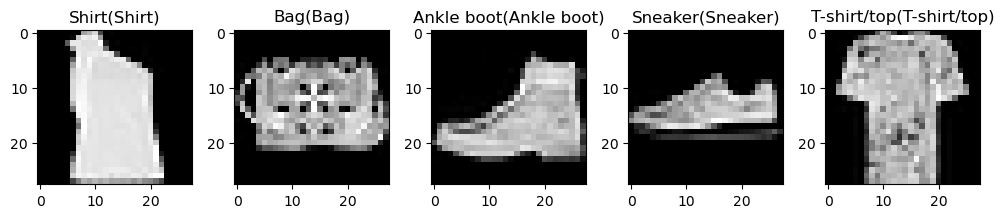

In [16]:
fig, ax = plt.subplots(1, 5, figsize=(10,5))

for idx in range(0,5):
    img_idx = np.random.randint(0, len(X_test))                              ### Random selection of images from X_test
    y_pred = mlp_full.predict(X_test[img_idx].reshape(1,784))
    predicted_label = class_labels[y_pred[0]]
    ax[idx].imshow(X_test[img_idx].reshape(28,28), cmap='gray')
    ax[idx].set_title(f"{predicted_label}({class_labels[y_test[img_idx]]})")

plt.tight_layout()
plt.show()

In [17]:
print(classification_report(y_test,y_pred_mlp_full))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.76      0.75      0.76      1000
           3       0.87      0.84      0.85      1000
           4       0.70      0.85      0.77      1000
           5       0.91      0.93      0.92      1000
           6       0.71      0.55      0.62      1000
           7       0.91      0.91      0.91      1000
           8       0.93      0.96      0.95      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



#### 5. Please apply a Sobel edge detector on the above dataset images (both training and testing), then train the same MLP classifier as above (on the whole new trianing set), show the prediction results of 5 samples from the (new) test set, with the "prediction (ground-truth label)" as title for each sample, and also reprot the main classification matrics. 

#### Similarly, apply a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then train the same MLP classifier, show the prediction, and the metrics, same as above. Compare the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification.

In [18]:
## Sobel Edge detected dataset

X_train_sobel=list()
X_test_sobel=list()

for img_idx in range(0, len(X_train)):
    
    image = X_train[img_idx]
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)
    sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobel_x, 2.0), 1.0, cv2.pow(sobel_y, 2.0), 1.0, 0.0))
    X_train_sobel.append(sobel)
    
for img_idx in range(0, len(X_test)):
    
    image = X_test[img_idx]
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)
    sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobel_x, 2.0), 1.0, cv2.pow(sobel_y, 2.0), 1.0, 0.0))
    X_test_sobel.append(sobel)
    

X_train_sobel = np.array(X_train_sobel)
X_test_sobel = np.array(X_test_sobel)

X_train_sobel_reshaped = X_train_sobel.reshape(X_train_sobel.shape[0], -1)
X_test_sobel_reshaped = X_test_sobel.reshape(X_test_sobel.shape[0], -1)

scaler = StandardScaler()
X_train_sobel_scaled = scaler.fit_transform(X_train_sobel_reshaped)
X_test_sobel_scaled = scaler.transform(X_test_sobel_reshaped)

In [19]:
%%time
mlp_full.fit(X_train_sobel_scaled, y_train)

CPU times: total: 3min 50s
Wall time: 1min 7s


MLPClassifier(alpha=1, max_iter=1000)

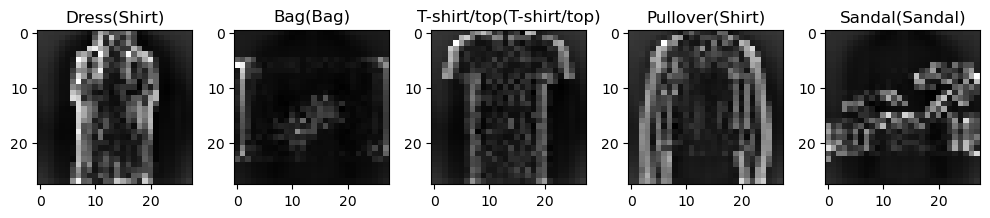

In [20]:
fig, ax = plt.subplots(1, 5, figsize=(10,5))

for idx in range(0,5):
    img_idx = np.random.randint(0, len(X_test_sobel_scaled))             ### Random selection of images from X_test_sobel_scaled
    y_pred = mlp_full.predict(X_test_sobel_scaled[img_idx].reshape(1,784))
    predicted_label = class_labels[y_pred[0]]
    ax[idx].imshow(X_test_sobel_scaled[img_idx].reshape(28,28), cmap='gray')
    ax[idx].set_title(f"{predicted_label}({class_labels[y_test[img_idx]]})")

plt.tight_layout()
plt.show()

In [21]:
y_pred_sobel = mlp_full.predict(X_test_sobel_scaled)
print(classification_report(y_test, y_pred_sobel))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.98      0.97      0.97      1000
           2       0.79      0.86      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.84      0.83      1000
           5       0.97      0.94      0.96      1000
           6       0.71      0.68      0.70      1000
           7       0.91      0.97      0.94      1000
           8       0.97      0.95      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [26]:
## Bilateral Filtered

X_train_bilateral_filtered = list()
X_test_bilateral_filtered = list()

for img_idx in range(0, len(X_train)):
    img_bilateral = cv2.bilateralFilter(np.float32(X_train[img_idx]), 9, 85, 85)
    X_train_bilateral_filtered.append(img_bilateral)

for img_idx in range(0, len(X_test)):
    img_bilateral = cv2.bilateralFilter(np.float32(X_test[img_idx]), 9, 85, 85)
    X_test_bilateral_filtered.append(img_bilateral)

X_train_bilateral = np.array(X_train_bilateral_filtered)
X_test_bilateral = np.array(X_test_bilateral_filtered)

X_train_bilateral_reshaped = X_train_sobel.reshape(X_train_bilateral.shape[0], -1)
X_test_bilateral_reshaped = X_test_sobel.reshape(X_test_bilateral.shape[0], -1)

scaler = StandardScaler()
X_train_bilateral_scaled = scaler.fit_transform(X_train_bilateral_reshaped)
X_test_bilateral_scaled = scaler.transform(X_test_bilateral_reshaped)

In [27]:
%%time
mlp_full.fit(X_train_bilateral_scaled, y_train)

CPU times: total: 4min 3s
Wall time: 1min 11s


MLPClassifier(alpha=1, max_iter=1000)

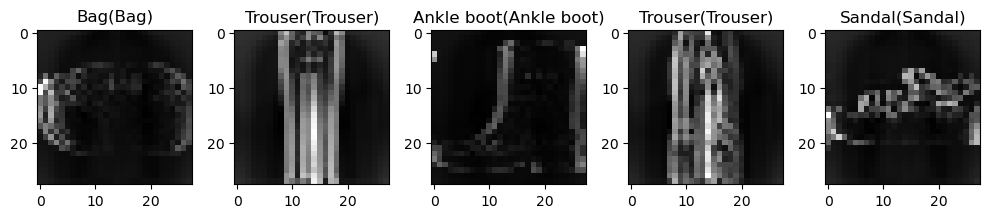

In [28]:
fig, ax = plt.subplots(1, 5, figsize=(10,5))

for idx in range(0,5):
    img_idx = np.random.randint(0, len(X_test_bilateral_scaled))     ### Random selection of images from X_test_bilateral_scaled
    y_pred = mlp_full.predict(X_test_bilateral_scaled[img_idx].reshape(1,784))
    predicted_label = class_labels[y_pred[0]]
    ax[idx].imshow(X_test_bilateral_scaled[img_idx].reshape(28,28), cmap='gray')
    ax[idx].set_title(f"{predicted_label}({class_labels[y_test[img_idx]]})")

plt.tight_layout()
plt.show()

In [29]:
y_pred_bilateral = mlp_full.predict(X_test_bilateral_scaled)

print(classification_report(y_test, y_pred_bilateral))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.86      0.80      1000
           3       0.88      0.90      0.89      1000
           4       0.86      0.72      0.79      1000
           5       0.96      0.96      0.96      1000
           6       0.70      0.72      0.71      1000
           7       0.90      0.97      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [44]:
# ## Sobel Edge detected dataset without Standard Scaler

# X_train_sobel=list()
# X_test_sobel=list()

# for img_idx in range(0, len(X_train)):
    
#     image = X_train[img_idx]
#     sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
#     sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)
#     sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobel_x, 2.0), 1.0, cv2.pow(sobel_y, 2.0), 1.0, 0.0))
#     X_train_sobel.append(sobel)
    
# for img_idx in range(0, len(X_test)):
    
#     image = X_test[img_idx]
#     sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
#     sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)
#     sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobel_x, 2.0), 1.0, cv2.pow(sobel_y, 2.0), 1.0, 0.0))
#     X_test_sobel.append(sobel)
    

# X_train_sobel = np.array(X_train_sobel)
# X_test_sobel = np.array(X_test_sobel)

# X_train_sobel_reshaped = X_train_sobel.reshape(X_train_sobel.shape[0], -1)
# X_test_sobel_reshaped = X_test_sobel.reshape(X_test_sobel.shape[0], -1)

# # scaler = StandardScaler()
# # X_train_sobel_scaled = scaler.fit_transform(X_train_sobel_reshaped)
# # X_test_sobel_scaled = scaler.transform(X_test_sobel_reshaped)

# %%time
# mlp_full.fit(X_train_sobel_reshaped, y_train)

# fig, ax = plt.subplots(1, 5, figsize=(10,5))

# for idx in range(0,5):
#     img_idx = np.random.randint(0, len(X_test_sobel_reshaped))             ### Random selection of images from X_test_sobel_scaled
#     y_pred = mlp_full.predict(X_test_sobel_reshaped[img_idx].reshape(1,784))
#     predicted_label = class_labels[y_pred[0]]
#     ax[idx].imshow(X_test_sobel_reshaped[img_idx].reshape(28,28), cmap='gray')
#     ax[idx].set_title(f"{predicted_label}({class_labels[y_test[img_idx]]})")

# plt.tight_layout()
# plt.show()

# y_pred_sobel = mlp_full.predict(X_test_sobel_reshaped)
# print(classification_report(y_test, y_pred_sobel))

In [38]:
# ## Bilateral Filtered without Standard Scaler

# X_train_bilateral_filtered = list()
# X_test_bilateral_filtered = list()

# for img_idx in range(0, len(X_train)):
#     img_bilateral = cv2.bilateralFilter(np.float32(X_train[img_idx]), 9, 85, 85)
#     X_train_bilateral_filtered.append(img_bilateral)

# for img_idx in range(0, len(X_test)):
#     img_bilateral = cv2.bilateralFilter(np.float32(X_test[img_idx]), 9, 85, 85)
#     X_test_bilateral_filtered.append(img_bilateral)

# X_train_bilateral = np.array(X_train_bilateral_filtered)
# X_test_bilateral = np.array(X_test_bilateral_filtered)

# X_train_bilateral_reshaped = X_train_sobel.reshape(X_train_bilateral.shape[0], -1)
# X_test_bilateral_reshaped = X_test_sobel.reshape(X_test_bilateral.shape[0], -1)

# # scaler = StandardScaler()
# # X_train_bilateral_scaled = scaler.fit_transform(X_train_bilateral_reshaped)
# # X_test_bilateral_scaled = scaler.transform(X_test_bilateral_reshaped)

# %%time
# mlp_full.fit(X_train_bilateral_reshaped, y_train)

# fig, ax = plt.subplots(1, 5, figsize=(10,5))

# for idx in range(0,5):
#     img_idx = np.random.randint(0, len(X_test_bilateral_reshaped))     ### Random selection of images from X_test_bilateral_scaled
#     y_pred = mlp_full.predict(X_test_bilateral_reshaped[img_idx].reshape(1,784))
#     predicted_label = class_labels[y_pred[0]]
#     ax[idx].imshow(X_test_bilateral_reshaped[img_idx].reshape(28,28), cmap='gray')
#     ax[idx].set_title(f"{predicted_label}({class_labels[y_test[img_idx]]})")

# plt.tight_layout()
# plt.show()

# y_pred_bilateral = mlp_full.predict(X_test_bilateral_reshaped)
# print(classification_report(y_test, y_pred_bilateral))

Observations from the models :-

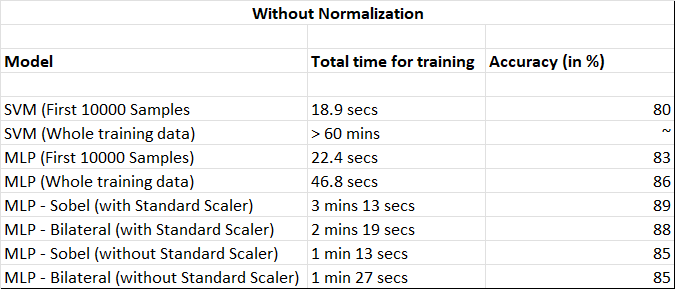
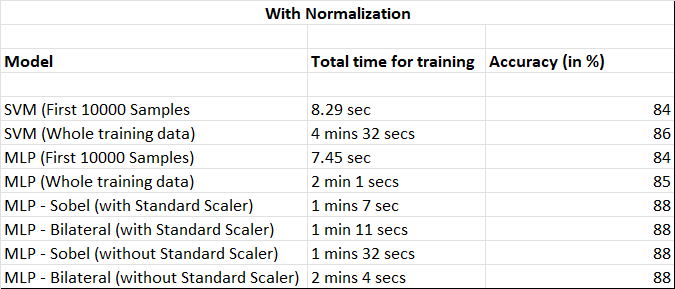
1. SVM has better accuracy as compared to MLP when trained on whole training dataset, but training time for MLP is less than SVM. Accuracy of MLP increased when trained with edge based and filtered dataset.

2. When the dataset is not normalized, the trainining time for SVM on whole dataset is long as compared to MLP.

3. In normalized dataset, the accuracy remains the same for both MLP Edge based and MLP Filter based classification with and without standard scaler, but the training time is less when trained with scaled dataset.

4. To conclude, Normalized data is giving more accurate results.